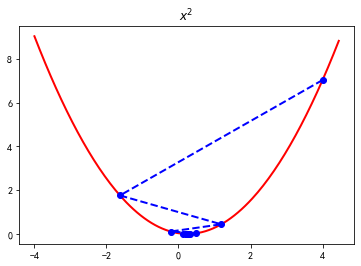

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def f1(x):
    return 0.5 * (x - 0.25) ** 2

def h1(x):
    return 0.5 * 2 *(x - 0.25)

if __name__ == '__main__':
    mpl.rcParams['font.family'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    GD_X = []
    GD_Y = []
    X = 4
    alpha = 1.5
    f_cur = f1(X)
    f_last = f_cur
    f_change = 1
    GD_X.append(X)
    GD_Y.append(f_cur)
    #
    iter_num = 0
    while f_change > 1e-10 and iter_num < 100:
        iter_num += 1
        X = X - alpha * h1(X)
        f_cur = f1(X)
        f_change = np.abs(f_last - f_cur)
        f_last = f_cur
        GD_X.append(X)
        GD_Y.append(f_cur)
    XX = np.arange(-4, 4.5, 0.05)
    # print(list(map(lambda x: f1(x), X)))
    Y = np.array(list(map(lambda x: f1(x), XX)))
    plt.figure(facecolor='w')
    plt.plot(XX, Y, 'r-', linewidth=2)
    plt.plot(GD_X, GD_Y, 'bo--', linewidth=2)
    plt.title('$x^2$')
    plt.show()

In [2]:
str1 = "i love you!"
print(str1.title())# 单词首字母大写
print(str1.upper())# 所有字母大写
print(str1.lower())# 所有字母小写
print(str1.capitalize())# 字符串首字母大写

I Love You!
I LOVE YOU!
i love you!
I love you!


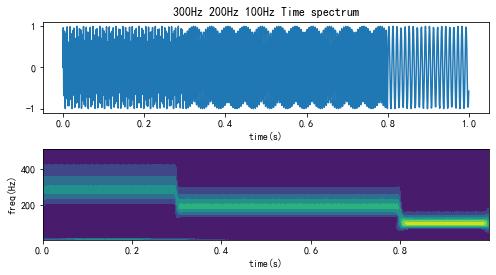

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

sampling_rate = 1024#采样频率
t = np.arange(0,1.0,1.0/sampling_rate)  #0-1.0之间的数，步长为1.0/sampling_rate
f1 = 100#频率
f2 = 200
f3 = 300
data = np.piecewise(t,[t<1,t<0.8,t<0.3],
                    [lambda t : np.sin(2 * np.pi * f1 * t),
                     lambda t : np.sin(2 * np.pi * f2 * t),
                     lambda t : np.sin(2 * np.pi * f3 * t)])
wavename = "cgau8"  #小波函数
totalscal = 256     
fc = pywt.central_frequency(wavename)#计算小波函数的中心频率
cparam = 2 * fc * totalscal  #常数c
scales = cparam/np.arange(totalscal,1,-1) 
[cwtmatr, frequencies] = pywt.cwt(data,scales,wavename,1.0/sampling_rate)#连续小波变换模块

plt.figure(figsize=(8, 4))
plt.subplot(211) #第一整行
plt.plot(t, data)
plt.xlabel(u"time(s)")
plt.title(u"300Hz 200Hz 100Hz Time spectrum")
plt.subplot(212) #第二整行

plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4) 
plt.show()

0.21396595270343702


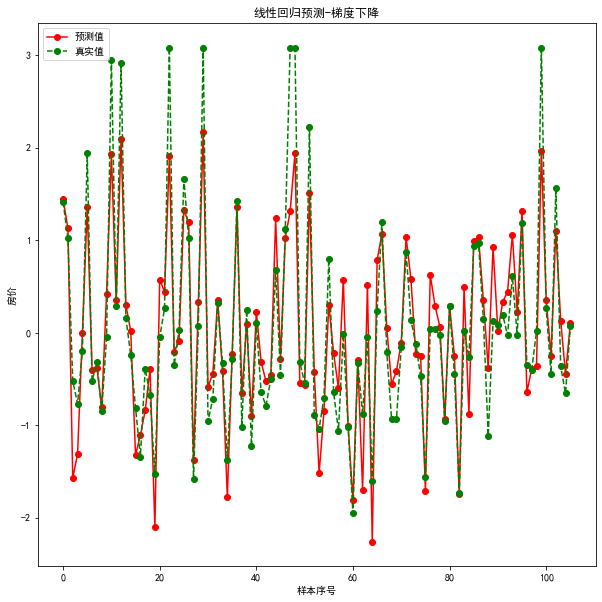

[200.0, 181.0804746151591, 165.95254212551555, 153.77499014253905, 143.89755418753072, 135.8173556586534, 129.14528900076218, 123.58008518482983, 118.88829787628536, 114.88885930778777, 111.44116197634688, 108.4358607692827, 105.78777412258123, 103.43040477689789, 101.31171022492376, 99.39083744897944, 97.6356017465266, 96.02053974463445, 94.52540551542103, 93.13400864871988, 91.83331624144964, 90.61275858831739, 89.46369211142148, 88.37898367738946, 87.3526886376934, 86.37980124453725, 85.45606096848586, 84.57780200447036, 83.74183615429959, 82.94536151257353, 82.18589111033205, 81.4611970036955, 80.76926632328876, 80.10826659392033, 79.47651824646539, 78.87247271656568, 78.29469488954777, 77.74184893251439, 77.21268677189025, 76.70603864247548, 76.22080526358965, 75.75595129791155, 75.31049982587123, 74.88352762812823, 74.47416111478567, 74.08157277563765, 73.70497805331533, 73.34363256252786, 72.99682959510919, 72.66389786337886, 72.34419944424889, 72.03712789421581, 71.742106511368

In [8]:
import numpy as np
import pandas as pd
import sklearn.datasets as dataset
import matplotlib.pyplot as plt
import matplotlib as mpl


class LinearRegression:
    def __init__(self, alpha, times):
        """
        alpha:float
            学习率，用来控制步长(权重调整的幅度)
        times:int
            循环迭代次数
        """
        self.alpha = alpha
        self.times = times

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为零
        self.W_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来计算每次
        self.loss = []
        # 进行循环，每次进行迭代计算
        for i in range(self.times):
            y_hat = np.dot(X, self.W_[1:]) + self.W_[0]
            # 计算真实值和预测值之间的差距
            error = y - y_hat
            # 将损失值加入到损失列表
            self.loss.append(np.sum(error ** 2) / 2)
            # 根据差距调整权重w_
            self.W_[0] += self.alpha * np.sum(error)
            self.W_[1:] += self.alpha * np.dot(X.T, error)

    def predict(self, X):
        X = np.asarray(X)
        result = np.dot(X, self.W_[1:]) + self.W_[0]
        return result


class StandardScaler:
    def fit(self, X):
        X = np.asarray(X)
        self.std = np.std(X, axis=0)
        self.mean = np.mean(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


if __name__ == '__main__':
    boston = dataset.load_boston()
    col_names = np.append(boston.feature_names, 'MEDV')
    data = pd.DataFrame(data=np.c_[boston.data, boston.target], columns=col_names)

    data = data.sample(len(data), random_state=0)
    train_x = data.iloc[:400, :-1]
    train_y = data.iloc[:400, -1]
    test_x = data.iloc[400:, :-1]
    test_y = data.iloc[400:, -1]
    S = StandardScaler()
    train_x = S.fit_transform(train_x)
    test_x = S.transform(test_x)

    S1 = StandardScaler()
    train_y = S1.fit_transform(train_y)
    test_y = S1.transform(test_y)
    LR = LinearRegression(alpha=0.00005, times=100000)
    # print(train_y)
    LR.fit(train_x, train_y)

    result = LR.predict(test_x)
    print(np.mean((result - test_y) ** 2))
    mpl.rcParams['font.family'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10, 10))
    plt.plot(result, 'ro-', label='预测值')

    plt.plot(test_y.values, 'go--', label='真实值')
    plt.title('线性回归预测-梯度下降')
    plt.xlabel('样本序号')
    plt.ylabel('房价')
    plt.legend()
    plt.show()
    print(LR.loss)
    m_test = np.array([[1,400,3000],[2,200,4000]])
    print(m_test)
    print(S1.fit_transform(m_test))

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724   0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425   0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170   0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
323   0.28392   0.0   7.38   0.0  0.493  5.708   74.3  4.7211   5.0  287.0   
192   0.08664  45.0   3.44   0.0  0.437  7.178   26.3  6.4798   5.0  398.0   
117   0.15098   0.0  10.01   0.0  0.547  6.021   82.6  2.7474   6.0  432.0   
47    0.22927   0.0   6.91   0.0  0.448  6.030   85.5  5.6894   3.0  233.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   

     PTRATIO       B  LSTAT  MEDV  
329     16.9  375.21   7.34

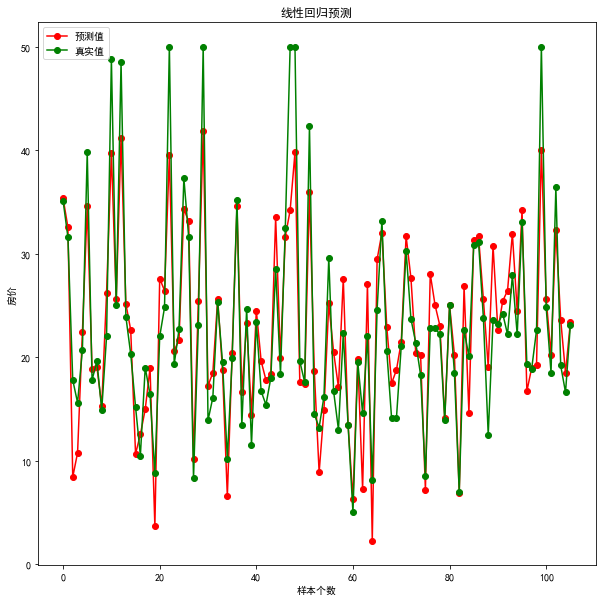

In [9]:
import sklearn.datasets as data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl


class LinearRegression:
    def __init__(self):
        pass

    def fit(self, X, y):
        X = np.asmatrix(X.copy())
        y = np.asmatrix(y).reshape(-1, 1)
        self.w_ = (X.T * X).I * X.T * y

    def predict(self, X):
        X = np.asmatrix(X.copy())
        result = X * self.w_
        return np.array(result).ravel()


if __name__ == '__main__':
    boston = data.load_boston()
    col_names = np.append(boston.feature_names, 'MEDV')
    data = pd.DataFrame(data=np.c_[boston.data, boston.target], columns=col_names)
    t = data.sample(len(data), random_state=0)
    # 增加一列 但是在最后添加 故不使用
    # t['ddd'] = 1
    # 往前面增加一列的方法
    print(t)
    newColumns = t.columns.insert(0, 'intercept')
    # 注意必须更新一下，否则会出现添加到最后一列的效果
    t = t.reindex(columns=newColumns)
    t['intercept'] = 1
    # print(t)
    train_x = t.iloc[:400, :-1]
    train_y = t.iloc[:400, -1].values
    test_x = t.iloc[400:, :-1]
    test_y = t.iloc[400:, -1].values
    print(test_y)
    # print(train_x)
    Lr = LinearRegression()
    Lr.fit(train_x, train_y)
    result = Lr.predict(test_x)
    # print(result)
    # print(np.mean((result - test_y) ** 2))
    # print(Lr.w_)
    print(result)
    print(test_y)
    mpl.rcParams['font.family'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10, 10))
    plt.plot(result, "ro-", label='预测值')
    plt.plot(test_y, "go-", label='真实值')
    plt.title('线性回归预测')
    plt.xlabel('样本个数')
    plt.ylabel('房价')
    plt.legend()
    plt.show()


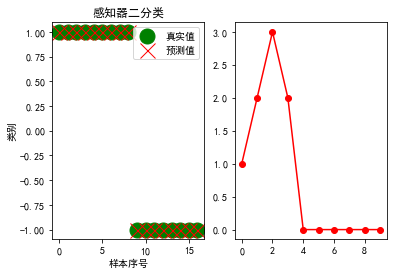

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn.datasets as dataset


class Perception:
    def __init__(self, alpha, times):
        """
        初始化方法
        :param alpha:学习率
        :param times: 迭代次数
        """
        self.alpha = alpha
        self.times = times

    def step(self, z):
        """
        阶跃函数
        :param z:数组类型，阶跃函数的参数，可以将z值映射为1 或者 -1
        :return: value int 类型 如果 z 大于等于0 则返回1 ，如果z小于等于0则返回-1
        """
        return np.where(z >= 0, 1, -1)

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，长度比初始长度多1 多出来的为截距
        self.w_ = np.zeros(1 + X.shape[1])
        self.loss = []
        # 循环指定的次数
        for i in range(self.times):
            loss = 0
            for x, target in zip(X, y):
                # 计算预测值
                y_hat = np.dot(x, self.w_[1:]) + self.w_[0]
                # 此时为 1 或者 -1
                y_hat = self.step(y_hat)
                # 计算损失 因为 y_hat 此时为 1 或 -1，
                loss += y_hat != target
                # 更新权重 w(j) = w(j) + 学习率 *（真实值　－　预测值）＊ｘ（ｊ）
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat) * x
                # print(self.w_)
            self.loss.append(loss)

    def predict(self, X):
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])


if __name__ == '__main__':
    data = pd.read_csv(r'iris.csv')
    data.drop_duplicates(inplace=True)
    # print(data['class'].value_counts()) 用来查看都有什么类型Iris-versicolor Iris-virginica Iris-setosa
    data['class'] = data['class'].map({"Iris-versicolor": 0, "Iris-virginica": 1, "Iris-setosa": -1})
    data = data[data['class'] != 0]
    t1 = data[data['class'] == 1]
    t2 = data[data['class'] == -1]
    t1 = t1.sample(len(t1), random_state=0)
    t2 = t2.sample(len(t2), random_state=0)
    train_x = np.r_[t1.iloc[:40, :-1], t2.iloc[:40, :-1]]
    train_y = np.r_[t1.iloc[:40, -1], t2.iloc[:40, -1]]
    test_x = np.r_[t1.iloc[40:, :-1], t2.iloc[40:, :-1]]
    test_y = np.r_[t1.iloc[40:, -1], t2.iloc[40:, -1]]
    p = Perception(0.1, 10)
    p.fit(train_x, train_y)
    result = p.predict(test_x)
    # print(result)
    # print(test_y)
    # print(p.loss)
    # print(p.w_)
    mpl.rcParams['font.family'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.subplot(1, 2, 1)
    plt.plot(test_y, 'go', ms=15, label='真实值')
    plt.plot(result, 'rx', ms=15, label='预测值')
    plt.title('感知器二分类')
    plt.xlabel('样本序号')
    plt.ylabel('类别')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(p.loss, 'ro-')
    plt.show()


In [14]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as data

if __name__ == '__main__':
    x_train = [[192,90,46],[180,80,44],[160,45,36],[170,65,41],[154,41,34],[165,60,40]]
    y_train = ["boy","boy","girl","boy","girl","boy"]
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(x_train,y_train)
    print(KNN.predict([[155, 45, 35],[175,70,42]]))
    print(range(1, 10)[::2][1])


['girl' 'boy']
3


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9666666666666667
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


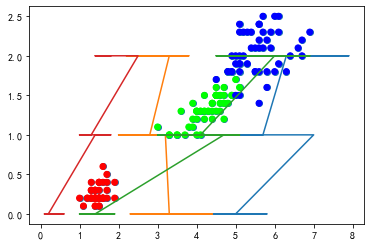

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [15]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as data
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

if __name__ == '__main__':
    iris = data.load_iris()
    x_train = iris.data
    y_train = iris.target
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    print(KNN.predict(x_train))
    print(y_train)
    print(KNN.score(x_train, y_train))
    cMap = ListedColormap(["#FF0000","#00FF00","#0000FF"])
    plt.scatter(x_train[:,2],x_train[:,3])
    plt.scatter(x_train[:,2],x_train[:,3],c=iris.target,cmap=cMap)
    print(iris.target)

    # plt.plot(x_train[:,1],y_train)
    # plt.plot(x_train[:,2],y_train)
    # plt.plot(x_train[:,3],y_train)
    # plt.plot(x_train[:,0],y_train)
    plt.plot(x_train, y_train)
    plt.show()
    print(x_train)
    print(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[18 90].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.